In [1]:
import pandas as pd
import numpy as np
import os 
import sys
from sklearn import metrics
from collections import defaultdict

## 1. Time Series Classification
### An interesting task in machine learning is classification of time series. In this problem, classify the activities of humans based on time series obtained by a Wireless Sensor Network.

#### (a) Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29 . The dataset contains 7 folders that represent seven types of activities. In each folder, there are multiple files each of which represents an instant of a human performing an activity. Each file containis 6 time series collected from activities of the same person, which are called avg rss12, var rss12, avg rss13, var rss13,vg rss23, and ar rss23. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.

##### (b) Keeping datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1,2, and 3 in other folders as test data and other datasets as train data.

##### (c) Feature Extraction Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features

### i. Types of time-domain features are usually used in time series classification.

Some of the time-domain features used in time-series classification are:

Median value of the time series

Autoregressive component of the time series 

Moving average component of the time series

Mean value of the time series

Minimum value of the time series

Maximum value of the time series

Range of the time series

Number of positive/negative peaks in a time series

Inter-quartile range of the time series

10th percentile of the time series


### ii. Extracting the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance.



In [2]:

d1 = defaultdict(list)
for act in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path='C:\\Users\\manja\\inf_552assignments\\assignment3\\AReM\\{}'.format(act)
    #path2 = unicode(path, sys.getfilesystemencoding())
    for fname in os.listdir(path):
        #print fname 
        df = pd.read_csv(path+'\\'+fname,skiprows=4,usecols=range(0,7))
        for data in df.columns[1:]:
            d1[data+"_mean"].append(np.mean(df[data]))
            d1[data+"_min"].append(np.min(df[data]))
            d1[data+"_max"].append(np.max(df[data]))
            d1[data+"_median"].append(np.median(df[data]))
            d1[data+"_1Q"].append(np.percentile(df[data],25))
            d1[data+"_3Q"].append(np.percentile(df[data],75))
            d1[data+"_std"].append(np.std(df[data]))
        

df_final = pd.DataFrame(d1)
df_final

,avg_rss12_1Q,avg_rss12_3Q,avg_rss12_max,avg_rss12_mean,avg_rss12_median,avg_rss12_min,avg_rss12_std,avg_rss13_1Q,avg_rss13_3Q,avg_rss13_max,...,var_rss13_median,var_rss13_min,var_rss13_std,var_rss23_1Q,var_rss23_3Q,var_rss23_max,var_rss23_mean,var_rss23_median,var_rss23_min,var_rss23_std
0,39.2500,42.0000,45.00,40.624792,40.500,37.25,1.475428,16.0000,23.2500,29.50,...,0.500,0.0,0.964652,0.0000,1.3000,1.92,0.570583,0.430,0.00,0.582308
1,42.0000,43.6700,45.67,42.812812,42.500,38.00,1.434054,19.0000,22.2500,29.50,...,0.500,0.0,1.046167,0.0000,1.3000,3.11,0.571083,0.430,0.00,0.600383
2,43.0000,45.0000,47.40,43.954500,44.330,35.00,1.557210,19.7500,24.0000,29.75,...,0.430,0.0,0.550083,0.0000,0.9400,1.79,0.493292,0.430,0.00,0.512971
3,39.1500,45.0000,47.75,42.179813,43.500,33.00,3.666840,20.5000,24.3725,30.00,...,0.830,0.0,0.952736,0.0000,1.0000,2.18,0.613521,0.500,0.00,0.523771
4,41.3300,42.7500,45.75,41.678063,41.750,33.00,2.241152,16.5000,22.0625,28.25,...,0.500,0.0,0.927833,0.0000,0.5000,1.79,0.383292,0.430,0.00,0.388759
5,42.5000,45.0000,48.00,43.454958,43.250,37.00,1.384653,13.0000,18.2700,27.00,...,0.500,0.0,0.994724,0.4300,0.8700,5.26,0.679646,0.500,0.00,0.621885
6,43.3100,44.6700,48.00,43.969125,44.500,36.25,1.616677,14.2500,18.0000,26.33,...,0.470,0.0,0.788162,0.0000,0.8300,2.96,0.555313,0.490,0.00,0.487318
7,23.1875,26.5000,51.00,24.562958,24.250,12.75,3.733619,18.0000,22.0000,25.33,...,0.470,0.0,0.926081,0.4300,0.8700,4.97,0.700188,0.500,0.00,0.692997
8,25.5000,30.0000,42.75,27.464604,28.000,0.00,3.579847,18.0000,22.5000,35.00,...,0.500,0.0,0.903493,0.4700,1.3000,6.76,1.122125,0.830,0.00,1.011287
9,26.1875,34.5000,50.00,32.586208,33.000,21.00,6.231642,10.0000,18.0000,28.25,...,0.500,0.0,1.025942,0.4700,1.3000,13.61,1.162042,0.830,0.00,1.331591


### iii. Estimating the standard deviation of each of the time-domain features you extracted from the data. Then, using Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.


In [3]:
df_boots=np.std(df_final)

In [4]:
df_bootstrap=pd.DataFrame(df_boots).rename(columns={0:'std'})

In [5]:
from sklearn.utils import resample
dict_lower={}
dict_upper={}
for c in df_final.columns.tolist():
    boot=[]
    for i in range(0,1000):
        sample = resample(df_final[c], n_samples=88)
        boot.append(np.std(sample))
    boot.sort()
    dict_lower[c]= boot[49]
    dict_upper[c]= boot[949]
#print dict_lower


In [6]:
df_table=df_bootstrap.join(pd.DataFrame.from_dict(dict_lower,orient='index').rename(columns={0:'lower CI-5%'})).join(pd.DataFrame.from_dict(dict_upper,orient='index').rename(columns={0:'upper CI-95%'}))
df_table


,std,lower CI-5%,upper CI-95%
avg_rss12_1Q,6.118526,5.546866,6.618415
avg_rss12_3Q,5.109643,4.314725,5.799715
avg_rss12_max,4.369322,3.246915,5.222785
avg_rss12_mean,5.305314,4.694426,5.822218
avg_rss12_median,5.409056,4.779188,5.967491
avg_rss12_min,9.515445,8.249230,10.677796
avg_rss12_std,1.760219,1.556296,1.935308
avg_rss13_1Q,4.196608,3.618787,4.681031
avg_rss13_3Q,4.147858,3.511693,4.652954
avg_rss13_max,4.847358,4.162402,5.398381


### iv. Using your judgement to select the three most important time-domain features (one option may be min, mean, and max).

The three important features are mean , median and max. The mean gives the average value , the median helps to capture the central tendency and max gives us the max value of the time series data  


In [7]:
from collections import defaultdict
d1 = defaultdict(list)

for act in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path='C:\\Users\\manja\\inf_552assignments\\assignment3\\train\\{}'.format(act)
    #path2 = unicode(path, sys.getfilesystemencoding())
    for fname in os.listdir(path):
        #print fname 
        df = pd.read_csv(path+'\\'+fname,skiprows=4,usecols=range(0,7))
        for data in df.columns[1:]:
            d1[data+"_mean"].append(np.mean(df[data]))
            d1[data+"_min"].append(np.min(df[data]))
            d1[data+"_max"].append(np.max(df[data]))
            d1[data+"_median"].append(np.median(df[data]))
            d1[data+"_1Q"].append(np.percentile(df[data],25))
            d1[data+"_3Q"].append(np.percentile(df[data],75))
            d1[data+"_std"].append(np.std(df[data]))
        d1['activity'].append(act)
df_train =pd.DataFrame(d1)

In [8]:
from collections import defaultdict
d1 = defaultdict(list)

for act in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path='C:\\Users\\manja\\inf_552assignments\\assignment3\\test\\{}'.format(act)
    #path2 = unicode(path, sys.getfilesystemencoding())
    for fname in os.listdir(path):
        #print fname 
        df = pd.read_csv(path+'\\'+fname,skiprows=4,usecols=range(0,7))
        for data in df.columns[1:]:
            d1[data+"_mean"].append(np.mean(df[data]))
            d1[data+"_min"].append(np.min(df[data]))
            d1[data+"_max"].append(np.max(df[data]))
            d1[data+"_median"].append(np.median(df[data]))
            d1[data+"_1Q"].append(np.percentile(df[data],25))
            d1[data+"_3Q"].append(np.percentile(df[data],75))
            d1[data+"_std"].append(np.std(df[data]))
        d1['activity'].append(act)
df_test =pd.DataFrame(d1)


## (d) Binary Classification Using Logistic Regression

### i. Assuming that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depicting scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (Seep. 129 of the textbook)

In [9]:
#d(1)
cols = [col for col in df_train.columns.tolist() if ((col.startswith('avg_rss12')
                                                     or col.startswith('var_rss12') or col.startswith('var_rss23') ) and (col.endswith('min')or col.endswith('max') or col.endswith('mean')) or col == 'activity')]
                                                                                    
cols                                                                          

['activity',
 'avg_rss12_max',
 'avg_rss12_mean',
 'avg_rss12_min',
 'var_rss12_max',
 'var_rss12_mean',
 'var_rss12_min',
 'var_rss23_max',
 'var_rss23_mean',
 'var_rss23_min']

In [10]:
df_train['activity'] = np.where(((df_train['activity'] == 'bending1')|(df_train['activity'] == 'bending2')),'bending','not-bending')

In [11]:
df_train_f=df_train[cols]

In [12]:
df_train_f

,activity,avg_rss12_max,avg_rss12_mean,avg_rss12_min,var_rss12_max,var_rss12_mean,var_rss12_min,var_rss23_max,var_rss23_mean,var_rss23_min
0,bending,47.40,43.954500,35.00,1.70,0.426250,0.0,1.79,0.493292,0.00
1,bending,47.75,42.179813,33.00,3.00,0.696042,0.0,2.18,0.613521,0.00
2,bending,45.75,41.678063,33.00,2.83,0.535979,0.0,1.79,0.383292,0.00
3,bending,48.00,43.454958,37.00,1.58,0.378083,0.0,5.26,0.679646,0.00
4,bending,48.00,43.969125,36.25,1.50,0.413125,0.0,2.96,0.555313,0.00
5,bending,50.00,32.586208,21.00,9.90,0.516125,0.0,13.61,1.162042,0.00
6,bending,33.00,29.881938,27.50,1.00,0.256438,0.0,6.40,0.701625,0.00
7,bending,45.50,30.938104,19.00,6.40,0.467167,0.0,6.73,1.107354,0.00
8,bending,47.50,31.058250,25.00,6.38,0.405458,0.0,4.92,1.098104,0.00
9,not-bending,45.00,36.819521,27.00,10.47,2.600146,0.0,8.99,2.887562,0.00


In [13]:

df_temp=pd.DataFrame()

In [14]:
j = 0
column_no = 1
for col in df_train_f.columns.tolist()[1:]:
    for i in range(0,69):
        df_temp.loc[j,'val'] = df_train_f.loc[i,col]
        df_temp.loc[j,'col'] = str(column_no)
        j = j + 1
    column_no = column_no + 1
df_temp

,val,col
0,47.40,1
1,47.75,1
2,45.75,1
3,48.00,1
4,48.00,1
5,50.00,1
6,33.00,1
7,45.50,1
8,47.50,1
9,45.00,1


In [15]:
j = 0
for i in range(0,621):
    df_temp.loc[i,'activity'] = df_train_f.loc[j,'activity']
    j = j + 1
    if j == 69:
        j=0

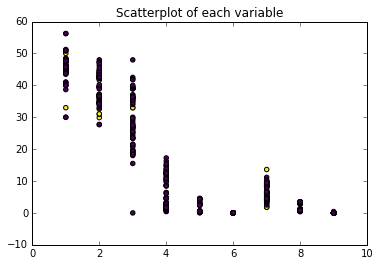

In [16]:
df_temp['activity_binary'] = np.where(df_temp['activity'] == 'bending',1,0)
import matplotlib.pyplot as plt
%matplotlib inline 
a=plt.scatter([df_temp['col']],[df_temp['val']],c=df_temp['activity_binary'], cmap='viridis')
plt.title('Scatterplot of each variable')
x_label="variables"
#plt.legend()
plt.show()

## ii. Breaking each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the 88 instances,I have 12 time series for each instance. Repeating the experiment in 1(d)i. comparing  considerable difference in the results with those of 1(d)i?

There is no much difference between the two plots 

In [17]:
#d2
from collections import defaultdict
d2_train = defaultdict(list)
d2_train['activity'] = []
col_var = ['avg_rss12','var_rss12','var_rss23']

for act in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path='C:\\Users\\manja\\inf_552assignments\\assignment3\\train\\{}'.format(act)
    #path2 = unicode(path, sys.getfilesystemencoding())
    for fname in os.listdir(path):
        #print fname 
        df = pd.read_csv(path+'\\'+fname,skiprows=4,usecols=range(0,7))
        df_new = np.array_split(df,2)
        for data in df_new:
            for c in col_var:
                
                d2_train[c+"_mean"].append(np.mean(data[c]))
                d2_train[c+"_median"].append(np.min(data[c]))
                d2_train[c+"_max"].append(np.max(data[c]))
            d2_train['activity'].append(act)
df_train_half =pd.DataFrame(d2_train)

In [18]:
df_train_half

,activity,avg_rss12_max,avg_rss12_mean,avg_rss12_median,var_rss12_max,var_rss12_mean,var_rss12_median,var_rss23_max,var_rss23_mean,var_rss23_median
0,bending1,46.50,44.057167,36.50,1.50,0.381042,0.00,1.79,0.598250,0.00
1,bending1,47.40,43.851833,35.00,1.70,0.471458,0.00,1.50,0.388333,0.00
2,bending1,47.75,43.278875,33.75,3.00,0.673292,0.00,1.53,0.640958,0.00
3,bending1,46.00,41.080750,33.00,2.86,0.718792,0.00,2.18,0.586083,0.00
4,bending1,45.75,41.621208,33.00,2.83,0.623083,0.00,1.79,0.419083,0.00
5,bending1,43.67,41.734917,39.25,1.12,0.448875,0.00,1.50,0.347500,0.00
6,bending1,48.00,44.117042,39.00,1.30,0.250042,0.00,5.26,0.815417,0.00
7,bending1,46.50,42.792875,37.00,1.58,0.506125,0.00,4.06,0.543875,0.00
8,bending1,45.00,43.486208,36.67,1.30,0.378667,0.00,2.28,0.524875,0.00
9,bending1,48.00,44.452042,36.25,1.50,0.447583,0.00,2.96,0.585750,0.00


In [19]:
cols=[col for col in df_train_half.columns.tolist() if ((col.endswith('mean') or col.endswith('median') or col.endswith('max')) and (col.endswith('avg_rss12') or col.startswith('var_rss12') or col.startswith('var_rss23')) or col=='activity')]

df_train_half['activity'] = np.where(((df_train_half['activity'] == 'bending1')|(df_train_half['activity'] == 'bending2')),'bending','not-bending')

In [20]:


df_train_f=df_train_half[cols]

In [21]:
df_temp=pd.DataFrame()
j = 0
column_no = 1
for col in df_train_f.columns.tolist()[1:]:
    for i in range(0,138):
        df_temp.loc[j,'val'] = df_train_f.loc[i,col]
        df_temp.loc[j,'col'] = str(column_no)
        j = j + 1
    column_no = column_no + 1

In [22]:
j = 0
for i in range(0,1241):
    df_temp.loc[i,'activity'] = df_train_f.loc[j,'activity']
    j = j + 1
    if j == 69:
        j=0

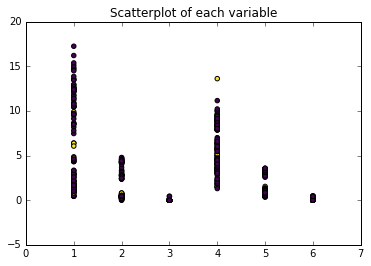

In [23]:
df_temp['activity_binary'] = np.where(df_temp['activity'] == 'bending',1,0)
import matplotlib.pyplot as plt
%matplotlib inline 
a=plt.scatter([df_temp['col']],[df_temp['val']],c=df_temp['activity_binary'], cmap='viridis')
plt.title('Scatterplot of each variable')
#plt.show()

### iii. Breaking each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression4 to solve the binary classification problem, using time-domain features. Calculating the p-values for your logistic regression parameters and refit a logistic regression model using your pruned set of features.5 Alternatively, using backward selection using sklearn.feature selection or glm in R. Using 5-fold cross-validation to determine the best value of l. Explaining what the right way and the wrong way are to perform cross-validation in this problem. Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case,  using stratified cross validation. 


The best value of L is 1,
the right way is perform the cross validation and then perform feature selection and the wrong way is to perform the feature selection after the cross validation 

In [24]:
#d3
from collections import defaultdict
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
d={}
b={}
vi={}
tr={}
col_var = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
for size in range (1,21):
    d3_train = defaultdict(list)
    d3_train['activity'] = []
    df_new=[]
    for act in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
        path='C:\\Users\\manja\\inf_552assignments\\assignment3\\train\\{}'.format(act)
        for fname in os.listdir(path):
            #print fname 
            df = pd.read_csv(path+'\\'+fname,skiprows=4,usecols=range(0,7))
            df_new = np.array_split(df,size)
            for data in df_new:
                for c in col_var:

                    d3_train[c+"_mean"].append(np.mean(data[c]))
                    d3_train[c+"_median"].append(np.min(data[c]))
                    d3_train[c+"_max"].append(np.max(data[c]))
                d3_train['activity'].append(act)
    df_train3 =pd.DataFrame(d3_train)
    df_train3 = df_train3.sample(frac=1,random_state=123).reset_index(drop=True)
    df_train3['activity'] = np.where(((df_train3['activity'] == 'bending1')|(df_train3['activity'] == 'bending2')),'bending','not-bending')
    x = df_train3.loc[:,df_train3.columns!='activity']
    y = df_train3['activity']
    
    AUC=[]
    bf=[]
    v_index=[]
    tr_index=[]
    kfold = StratifiedKFold(n_splits=5)
    for train_index,val_index in kfold.split(x,y):
        
        x_train, x_validation = x.iloc[train_index.tolist(),:], x.iloc[val_index.tolist(),:]
        y_train, y_validation = y[train_index.tolist()], y[val_index.tolist()]
        #print x_train
        #if len(np.unique(y_validation)) == 1:
        #    continue
        lr_model = LogisticRegression()
        rfecv=RFECV(estimator=lr_model,cv=StratifiedKFold(5),scoring='accuracy')
        features=rfecv.fit(x_train,y_train).ranking_==1
        x_train=x_train.loc[:,features]
        x_validation=x_validation.loc[:,features]
        lr_model = lr_model.fit(x_train, y_train)
        validation = [1 if i == 'bending' else 0 for i in y_validation.tolist()]
        predicted = [1 if i == 'bending' else 0 for i in lr_model.predict(x_validation).tolist()]
        fpr, tpr, thershold = metrics.roc_curve(validation,predicted)
        AUC.append(metrics.auc(fpr, tpr))
        bf.append(x_train.columns)
        v_index.append(val_index)
        tr_index.append(train_index)
        
    d[size] = np.max(AUC)
    b[size]=bf[np.argmax(AUC)]
    vi[size]=v_index[np.argmax(AUC)]
    tr[size]=tr_index[np.argmax(AUC)]
dd = pd.DataFrame(d,index=[0])
dd = dd.T
#dd['L'] = dd.index
dd.rename(columns={0:'Max AUC across the folds'},inplace=True)
#dd = dd[['L','Mean AUC across the folds']]
dd
#print vi


,Max AUC across the folds
1,1.000000
2,1.000000
3,0.900000
4,0.989583
5,0.888889
6,0.893056
7,0.875000
8,0.918155
9,0.896991
10,0.963889


In [25]:
b[1] #selectig best features with L=1

Index([u'avg_rss12_mean', u'avg_rss13_mean', u'avg_rss23_max',
       u'avg_rss23_mean', u'avg_rss23_median', u'var_rss12_max',
       u'var_rss23_mean'],
      dtype='object')

### iv. Reporting the confusion matrix and show the ROC and AUC for your classifieron train data. Reporting the parameters of your logistic regression βi’s as well as the p-values associated with them.

In [26]:
#d4
# running for L=1 
col_var = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
d4_train = defaultdict(list)
d4_train['activity'] = []

for act in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path='C:\\Users\\manja\\inf_552assignments\\assignment3\\train\\{}'.format(act)
    for fname in os.listdir(path):
        #print fname 
        df = pd.read_csv(path+'\\'+fname,skiprows=4,usecols=range(0,7))
        for data in col_var:
            d4_train[data+"_mean"].append(np.mean(df[data]))
            d4_train[data+"_median"].append(np.min(df[data]))
            d4_train[data+"_max"].append(np.max(df[data]))
        d4_train['activity'].append(act)
df_train4 =pd.DataFrame(d4_train)
df_train4 = df_train4.sample(frac=1,random_state=123).reset_index(drop=True)
df_train4['activity'] = np.where(((df_train4['activity'] == 'bending1')|(df_train4['activity'] == 'bending2')),'bending','not-bending')
#x = df_train4.loc[:,df_train4.columns!='activity']
x=df_train4[b[1]]
y = df_train4['activity']


In [28]:
train_index=tr[1]
val_index=vi[1]
x_train, x_val = x.iloc[train_index,:], x.iloc[val_index,:]
y_train, y_val = y[train_index], y[val_index]
print x_val.shape
model = LogisticRegression()
model = model.fit(x_train, y_train)


actual = [1 if i == 'bending' else 0 for i in y_val.tolist()]
predicted = [1 if i == 'bending' else 0 for i in model.predict(x_val).tolist()]

conf_mat = metrics.confusion_matrix(actual,predicted)
conf_mat

(14, 7)


array([[12,  0],
       [ 0,  2]], dtype=int64)

In [29]:

fpr, tpr, threshold = metrics.roc_curve(actual,predicted)
auc = metrics.auc(fpr, tpr)
auc


1.0

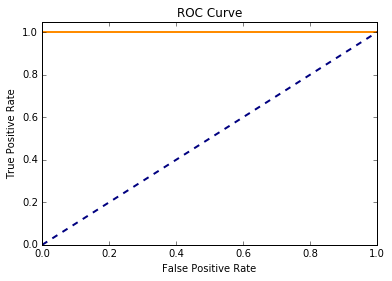

In [30]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
#plt.legend(loc="lower right")
plt.show()

In [31]:
#model.coef_[0].tolist()
coef = pd.DataFrame({"Variable Name":b[1],"Coefficient value":model.coef_[0].tolist()})
coef[['Variable Name','Coefficient value']]

,Variable Name,Coefficient value
0,avg_rss12_mean,0.590774
1,avg_rss13_mean,0.219186
2,avg_rss23_max,-0.566276
3,avg_rss23_mean,-0.384609
4,avg_rss23_median,-0.604351
5,var_rss12_max,0.413606
6,var_rss23_mean,0.240135


In [32]:
from sklearn.feature_selection import chi2
#X, y = data.data, data.target
scores, pvalues = chi2(x_train, y_train)
p_values = pd.DataFrame({"p-value":pvalues,"Variable Name":b[1]})
p_values[["Variable Name","p-value"]]

,Variable Name,p-value
0,avg_rss12_mean,6.275635e-01
1,avg_rss13_mean,1.517251e-01
2,avg_rss23_max,3.308670e-08
3,avg_rss23_mean,1.905387e-09
4,avg_rss23_median,1.182848e-34
5,var_rss12_max,4.426941e-03
6,var_rss23_mean,4.430096e-02


## v. Testing the classifier on the test set.  Breaking the time series in your test set into the same number of time series into which you broke your training set. Remembering that the classifier has to be tested using the features extracted from the test set. Comparing the accuracy on the test set with the cross-validation accuracy you obtained previously

The models runs accurately on the training and testing with AUC 1 and seems to perform well .

In [33]:
#d5
col_var = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
d5_train = defaultdict(list)
d5_train['activity'] = []

for act in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path='C:\\Users\\manja\\inf_552assignments\\assignment3\\train\\{}'.format(act)
    for fname in os.listdir(path):
        #print fname 
        df = pd.read_csv(path+'\\'+fname,skiprows=4,usecols=range(0,7))
        for data in col_var:
            d5_train[data+"_mean"].append(np.mean(df[data]))
            d5_train[data+"_median"].append(np.min(df[data]))
            d5_train[data+"_max"].append(np.max(df[data]))
        d5_train['activity'].append(act)
df_train5 =pd.DataFrame(d5_train)


df_train5['activity'] = np.where(((df_train5['activity'] == 'bending1')|(df_train5['activity'] == 'bending2')),'bending','not-bending')
df_train5 = df_train5.sample(frac=1,random_state=53).reset_index(drop=True)
#x = df_train4.loc[:,df_train4.columns!='activity']
x=df_train5[b[1]]
y = df_train5['activity']


d_test5 = defaultdict(list)
d_test5['activity'] = []

for act in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path='C:\\Users\\manja\\inf_552assignments\\assignment3\\test\\{}'.format(act)
    for fname in os.listdir(path):
        #print fname 
        df = pd.read_csv(path+'\\'+fname,skiprows=4,usecols=range(0,7))
        for data in col_var:
            d_test5[data+"_mean"].append(np.mean(df[data]))
            d_test5[data+"_median"].append(np.min(df[data]))
            d_test5[data+"_max"].append(np.max(df[data]))
        d_test5['activity'].append(act)
df_test5 =pd.DataFrame(d_test5)
df_test5['activity'] = np.where(((df_test5['activity'] == 'bending1')|(df_test5['activity'] == 'bending2')),'bending','not-bending')
#x = df_train4.loc[:,df_train4.columns!='activity']
#b[1].append('activity')
#print df_train5.shape

In [34]:
#c=[]
bc=[x for x in b[1]]
bc.append('activity')

In [35]:
bc

['avg_rss12_mean',
 'avg_rss13_mean',
 'avg_rss23_max',
 'avg_rss23_mean',
 'avg_rss23_median',
 'var_rss12_max',
 'var_rss23_mean',
 'activity']

In [36]:
#df_test5 = df_test5.sample(frac=1,random_state=123).reset_index(drop=True)
df_test5=df_test5[bc]
df_train5=df_train5[bc]
print  df_test5.shape,df_train5.shape

x_train5 = df_train5.loc[:,df_train5.columns!='activity']
y_train5 = df_train5['activity']
x_test5 = df_test5.loc[:,df_test5.columns!='activity']
y_test5 = df_test5['activity']
#print y_train

model = LogisticRegression()
model = model.fit(x_train5, y_train5)
actual = [1 if i == 'bending' else 0 for i in y_test5.tolist()]
predicted = [1 if i == 'bending' else 0 for i in model.predict(x_test5).tolist()]
conf_matrix = metrics.confusion_matrix(actual,predicted)
print("Confusion Matrix for the test set: ")
print(conf_matrix)
fpr1, tpr1, threshold = metrics.roc_curve(actual,predicted)
auc = metrics.auc(fpr1, tpr1)
print("AUC for the test set: ")
print(auc)


(19, 8) (69, 8)
Confusion Matrix for the test set: 
[[15  0]
 [ 0  4]]
AUC for the test set: 
1.0


### vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

No the classes are not well seperated, as we can see that the bending class is less and non bending classes are more. Therefore it causes instability 


### vii. From the confusion matrices obtained, are there any imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

yes there is class imbalance

Confusion Matrix for the test set: 
[[15  0]
 [ 0  4]]
AUC for the test set: 
1.0


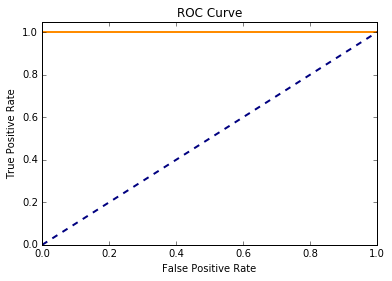

In [37]:
#d7
x_train = df_train5.loc[:,df_train5.columns!='activity']
y_train = df_train5['activity']
x_test = df_test5.loc[:,df_test5.columns!='activity']
y_test = df_test5['activity']

model = LogisticRegression(class_weight='balanced')
model = model.fit(x_train, y_train)
actual = [1 if i == 'bending' else 0 for i in y_test.tolist()]
predicted = [1 if i == 'bending' else 0 for i in model.predict(x_test).tolist()]

cm = metrics.confusion_matrix(actual,predicted)
print("Confusion Matrix for the test set: ")
print(cm)

fpr, tpr, threshold = metrics.roc_curve(actual,predicted)
auc = metrics.auc(fpr, tpr)
print("AUC for the test set: ")
print(auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
#plt.legend(loc="lower right")
plt.show()

# (e) Binary Classification Using L1-penalized logistic regression
### i. Repeat 1(d)iii using L1-penalized logistic regression,7 i.e. instead of using pvalues for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.

In [38]:
#e1
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV
dd={}
col_var = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
for size in range (1,21):
    d_train = defaultdict(list)
    d_train['activity'] = []
    for act in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
        path='C:\\Users\\manja\\inf_552assignments\\assignment3\\train\\{}'.format(act)
        for fname in os.listdir(path):
            #print fname 
            df = pd.read_csv(path+'\\'+fname,skiprows=4,usecols=range(0,7))
            df_new = np.array_split(df,size)
            for data in df_new:
                for c in col_var:

                    d_train[c+"_mean"].append(np.mean(data[c]))
                    d_train[c+"_min"].append(np.min(data[c]))
                    d_train[c+"_max"].append(np.max(data[c]))
                d_train['activity'].append(act)
    df_train =pd.DataFrame(d_train)
    df_train = df_train.sample(frac=1,random_state=123).reset_index(drop=True)
    df_train['activity'] = np.where(((df_train['activity'] == 'bending1')|(df_train['activity'] == 'bending2')),'bending','not-bending')
    x = df_train.loc[:,df_train.columns!='activity']
    y = df_train['activity']
    #print x.shape
    x1=x.values
    n= preprocessing.MinMaxScaler()
    sc=n.fit_transform(x1)
    x=pd.DataFrame(sc,columns=x.columns)
    auc = []
    c = []
    kf = StratifiedKFold(n_splits=5)    
    for train_index,val_index in kf.split(x,y):
        x_train, x_val = x.iloc[train_index.tolist(),:], x.iloc[val_index.tolist(),:]
        y_train, y_val = y[train_index.tolist()], y[val_index.tolist()]
        if len(np.unique(y_val)) == 1:
            continue
            
        model = LogisticRegressionCV(Cs=10,penalty='l1',solver='liblinear')
        model = model.fit(x_train, y_train)
        actual = [1 if i == 'bending' else 0 for i in y_val.tolist()]
        predicted = [1 if i == 'bending' else 0 for i in model.predict(x_val).tolist()]
        fpr, tpr,threshold = metrics.roc_curve(actual,predicted)
        auc.append(metrics.auc(fpr, tpr))
        c.append(model.C_)
    dd[size] = list(zip(auc,c))    

In [39]:
auc = []
C = []
for i in dd.keys():
    for j in range(0,5):
        auc.append(dd[i][j][0])
for i in dd.keys():
    for j in range(0,5):
        C.append(dd[i][j][1][0])
d_tab = pd.DataFrame({"L":list(np.repeat(list(dd.keys()),5)),"CV AUC":auc,"Optimal C":C})
d_tab[['L','Optimal C','CV AUC']]

,L,Optimal C,CV AUC
0,1,166.810054,1.000000
1,1,2.782559,0.750000
2,1,166.810054,1.000000
3,1,1291.549665,1.000000
4,1,166.810054,1.000000
5,2,21.544347,1.000000
6,2,21.544347,0.854167
7,2,166.810054,0.812500
8,2,21.544347,1.000000
9,2,21.544347,0.666667


In [40]:
d_test = defaultdict(list)
d_test['activity'] = []

for act in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path='C:\\Users\\manja\\inf_552assignments\\assignment3\\test\\{}'.format(act)
    for fname in os.listdir(path):
        #print fname 
        df = pd.read_csv(path+'\\'+fname,skiprows=4,usecols=range(0,7))
        for data in col_var:
            d_test[data+"_mean"].append(np.mean(df[data]))
            d_test[data+"_median"].append(np.min(df[data]))
            d_test[data+"_max"].append(np.max(df[data]))
        d_test['activity'].append(act)
df_test =pd.DataFrame(d_test)
df_test['activity'] = np.where(((df_test['activity'] == 'bending1')|(df_test['activity'] == 'bending2')),'bending','not-bending')

x_train = df_train.loc[:,df_train.columns!='activity']
y_train = df_train['activity']
x_test = df_test.loc[:,df_test.columns!='activity']
y_test = df_test['activity']

model = LogisticRegression(penalty='l1',C=166.810054,solver='liblinear')
model = model.fit(x_train, y_train)
actual = [1 if i == 'bending' else 0 for i in y_test.tolist()]
predicted = [1 if i == 'bending' else 0 for i in model.predict(x_test).tolist()]

conf_matrix = metrics.confusion_matrix(actual,predicted)
print("Confusion Matrix for the test set: ")
print(conf_matrix)

fpr, tpr, threshold = metrics.roc_curve(actual,predicted)
auc = metrics.auc(fpr, tpr)
print("AUC for the test set: ")
print(auc)

from sklearn.feature_selection import chi2
#X, y = data.data, data.target
scores, pvalues = chi2(x_train, y_train)
p_values = pd.DataFrame({"p-value":pvalues,"Variable Name":x_train.columns})
p_values[["Variable Name","p-value"]]

Confusion Matrix for the test set: 
[[14  1]
 [ 0  4]]
AUC for the test set: 
0.966666666667


,Variable Name,p-value
0,avg_rss12_max,4.154941e-08
1,avg_rss12_mean,3.677699e-03
2,avg_rss12_min,5.534166e-01
3,avg_rss13_max,2.005191e-12
4,avg_rss13_mean,1.347296e-16
5,avg_rss13_min,1.991961e-14
6,avg_rss23_max,5.028859e-127
7,avg_rss23_mean,7.351342e-198
8,avg_rss23_min,0.000000e+00
9,var_rss12_max,1.689662e-71


### ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

The L1 penalized is easier to implement , the variable selection performs better in test set with AUC 1 when comapared to L1 penalized which has 0.96 AUc for the test set

## (f) Multi-class Classification (The Realistic Case)
### i. Find the best l in the same way as you found it in 1(e)i to build an L1- penalized multinomial regression model to classify all activities in your training set.9 Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.

the best L value is - 5


In [41]:
#f
dd={}
ac={}
col_var = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
for size in range (1,21):
    d_train = defaultdict(list)
    d_train['activity'] = []
    df_new=[]
    count =0
    for act in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
        path='C:\\Users\\manja\\inf_552assignments\\assignment3\\train\\{}'.format(act)
        
        for fname in os.listdir(path):
            #print fname 
            df = pd.read_csv(path+'\\'+fname,skiprows=4,usecols=range(0,7))
            df_new = np.array_split(df,size)
            for data in df_new:
                for c in col_var:

                    d_train[c+"_mean"].append(np.mean(data[c]))
                    d_train[c+"_min"].append(np.min(data[c]))
                    d_train[c+"_max"].append(np.max(data[c]))
                
                d_train['activity'].append(count)
        count=count+1       
    df_train =pd.DataFrame(d_train)
    #df_train = df_train.sample(frac=1,random_state=123).reset_index(drop=True)
    #df_train['activity'] = np.where(((df_train['activity'] == 'bending1')|(df_train['activity'] == 'bending2')),'bending','not-bending')
    x = df_train.loc[:,df_train.columns!='activity']
    y = df_train['activity']
    
     
    #Normalizing each feature to [0,1] scale
    x1=x.values
    n= preprocessing.MinMaxScaler()
    sc=n.fit_transform(x1)
    x=pd.DataFrame(sc,columns=x.columns)
    auc = []
    c = []
    accuracy=[]
    kf = StratifiedKFold(n_splits=5)    
    for train_index,val_index in kf.split(x,y):
        x_train, x_val = x.iloc[train_index.tolist(),:], x.iloc[val_index.tolist(),:]
        y_train, y_val = y[train_index.tolist()], y[val_index.tolist()]
        if len(np.unique(y_val)) == 1:
            continue
            
        model = LogisticRegressionCV(Cs=10,penalty='l1',solver='liblinear')
        model = model.fit(x_train, y_train)
        #actual = [1 if i == 'bending' else 0 for i in y_val.tolist()]
        #predicted = [1 if i == 'bending' else 0 for i in model.predict(x_val).tolist()]
        #fpr, tpr,threshold = metrics.roc_curve(y_val,model.predict(x_val))
        #auc.append(metrics.auc(fpr, tpr))
        c.append(model.C_)
        accuracy.append(model.score(x_val,y_val))
    ac[size]= max(accuracy)
    dd[size] = list(zip(c))
    
    

    
dd
ac       

C:\Users\manja\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


{1: 0.90909090909090906,
 2: 0.82758620689655171,
 3: 0.82608695652173914,
 4: 0.8771929824561403,
 5: 0.92753623188405798,
 6: 0.83950617283950613,
 7: 0.81632653061224492,
 8: 0.87155963302752293,
 9: 0.91269841269841268,
 10: 0.83333333333333337,
 11: 0.83333333333333337,
 12: 0.80838323353293418,
 13: 0.9101123595505618,
 14: 0.80612244897959184,
 15: 0.82125603864734298,
 16: 0.8169642857142857,
 17: 0.7923728813559322,
 18: 0.81818181818181823,
 19: 0.79622641509433967,
 20: 0.80434782608695654}

In [42]:
conf_matrix = metrics.confusion_matrix(y_val,model.predict(x_val))
print("Confusion Matrix for the test set: ")
print(conf_matrix)

Confusion Matrix for the test set: 
[[ 7  0  0  0  7  6  0]
 [ 0  7  0  1  8  0  0]
 [ 0  0 47  0  0  1  0]
 [ 0  0  0 36  0 12  0]
 [ 0  0  0  1 21 26  0]
 [ 0  0  0  2 10 36  0]
 [ 0  0  1  0  0  0 47]]


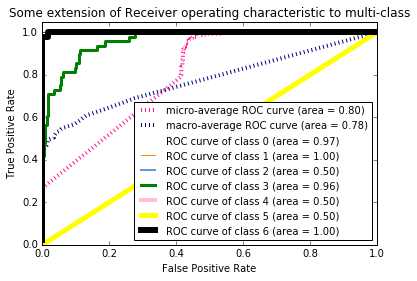

In [43]:
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
y_train = label_binarize(y_train, classes=[0,1,2,3,4,5,6])
n_classes = y_train.shape[1]
y_val = label_binarize(y_val, classes=[0,1,2,3,4,5,6])
n_classes = y_val.shape[1]

classifier = OneVsRestClassifier(LogisticRegressionCV(cv=StratifiedKFold(5),penalty='l1',solver='liblinear'))
score=classifier.fit(x_train, y_train).decision_function(x_val)
pred=classifier.predict(x_val)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
                    
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','green','pink','yellow','black'])
lw=[0,1,2,3,4,5,6]
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
plt.rcParams.update(params)
plt.plot([2, 2], [2, 2], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### ii. Repeat 1(f)i using a Naıve Bayes’ classifier. Use both Gaussian and Multinomial priors and compare the results

In [44]:
#f2

col_var = ['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
d_train = defaultdict(list)
d_train['activity'] = []

for act in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path='C:\\Users\\manja\\inf_552assignments\\assignment3\\train\\{}'.format(act)
    for fname in os.listdir(path):
        #print fname 
        df = pd.read_csv(path+'\\'+fname,skiprows=4,usecols=range(0,7))
        for data in col_var:
            d_train[data+"_mean"].append(np.mean(df[data]))
            d_train[data+"_median"].append(np.min(df[data]))
            d_train[data+"_max"].append(np.max(df[data]))
        d_train['activity'].append(act)
df_train =pd.DataFrame(d_train)

    
for act in ['bending1','bending2','cycling','lying','sitting','standing','walking']:
    path='C:\\Users\\manja\\inf_552assignments\\assignment3\\test\\{}'.format(act)
    for fname in os.listdir(path):
        #print fname 
        df = pd.read_csv(path+'\\'+fname,skiprows=4,usecols=range(0,7))
        for data in col_var:
            d_test[data+"_mean"].append(np.mean(df[data]))
            d_test[data+"_median"].append(np.min(df[data]))
            d_test[data+"_max"].append(np.max(df[data]))
        d_test['activity'].append(act)
df_test =pd.DataFrame(d_test)
x_train = df_train.loc[:,df_train.columns!='activity']
y_train = df_train['activity']
x_test = df_test.loc[:,df_test.columns!='activity']
y_test = df_test['activity']

from sklearn.naive_bayes import GaussianNB, MultinomialNB
act_no ={'bending1':0,'bending2':1,'cycling':2,'lying':3,'sitting':4,'standing':5,'walking':6}
gausnb= GaussianNB() 
y_pred_gauss=[]
y_true_gauss=[]
gb=gausnb.fit(x_train, y_train)
gb_pred=gb.predict(x_test)
for i in list(gb_pred):
    y_pred_gauss.append(act_no[i])
for i in list(y_test):
    y_true_gauss.append(act_no[i])
print("The confusion matrix for gaussian naiive base \n {}".format(metrics.confusion_matrix(y_true_gauss, y_pred_gauss)))
print("Accuracy{}".format(gausnb.score(x_test,y_test)))    
act_no ={'bending1':0,'bending2':1,'cycling':2,'lying':3,'sitting':4,'standing':5,'walking':6}
multinb = MultinomialNB() 
y_pred_multi=[]
y_true_multi=[]
mnb=multinb.fit(x_train, y_train)
mnb_pred=mnb.predict(x_test)
for i in list(mnb_pred):
    y_pred_multi.append(act_no[i])
for i in list(y_test):
    y_true_multi.append(act_no[i])
print("The confusion matrix for multinomial  naiive base \n {}".format(metrics.confusion_matrix(y_true_multi, y_pred_multi)))
print("Accuracy{}".format(multinb.score(x_test,y_test)))

The confusion matrix for gaussian naiive base 
 [[4 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 6 0 0 0 0]
 [0 0 0 4 2 0 0]
 [0 0 0 0 6 0 0]
 [0 0 0 0 0 6 0]
 [0 0 0 0 0 0 6]]
Accuracy0.947368421053
The confusion matrix for multinomial  naiive base 
 [[4 0 0 0 0 0 0]
 [0 2 2 0 0 0 0]
 [0 0 4 0 0 0 2]
 [0 0 0 6 0 0 0]
 [0 0 0 0 4 2 0]
 [0 0 0 2 2 2 0]
 [0 0 0 0 0 0 6]]
Accuracy0.736842105263


### iii. Which method is better for multi-class classification in this problem?

In this case we can see that gaussian naiive bayes is more  better and gives an accuracy 0.947